# Assignment - 6

## SMS Spam Collection

### Introduction

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,572 messages, tagged according being ham (legitimate) or spam.

The file contain one message per line. Each line is composed by the label (ham or spam) and the raw text seperated by a tab.

### Objective

To perform the exploratory data analysis on Spam Collection Dataset and to predict whether the text ham or spam. Therefore, it is a classification problem.

## 1. Getting things ready for the project

### 1.1 Import the required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import string

### 1.2 Load the data

In [3]:
# Reading csv file to the pandas dataframe

sms_spam_collection = pd.read_csv('SMSSpamCollection', sep="\t", names = ['Category','Text'])

- Separated the data into two columns : Category (ham/spam) and Text while loading the data.

## 2. Perform the Exploratory Data Analysis on the data set

In [4]:
# Shows top 5 rows of the dataset

sms_spam_collection.head()

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# Tells the shape of dataframe

print("No. of rows    : ", sms_spam_collection.shape[0])
print("No. of columns : ", sms_spam_collection.shape[1])

No. of rows    :  5572
No. of columns :  2


In [6]:
# Showing the column names

sms_spam_collection.columns

Index(['Category', 'Text'], dtype='object')

In [7]:
sms_spam_collection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Text      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


##### Observation :
- Both the columns are of 'object' type.
- There are no missing values.

In [8]:
sms_spam_collection['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

##### Observation :
- There are 2 types of value in 'Category' column : ham and spam.
- 4825 are ham texts and 747 are spam texts.

In [9]:
sms_spam_collection.describe(include = "all")

,Category,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


##### Observation :
 1. Category
    - There are 2 unique values.
    - Most frequent category is 'ham'.
    - Frequency of 'ham' is 4825.<br><br>
    
 2. Text
    - There are 5169 unique values.
    - Most frequent text is 'Sorry, I'll call later'.
    - This text is repeating 30 times.

In [10]:
sms_spam_collection.isnull().sum()

Category    0
Text        0
dtype: int64

- There is no null values.

## Plots

### a. Count Plot And Donut Chart

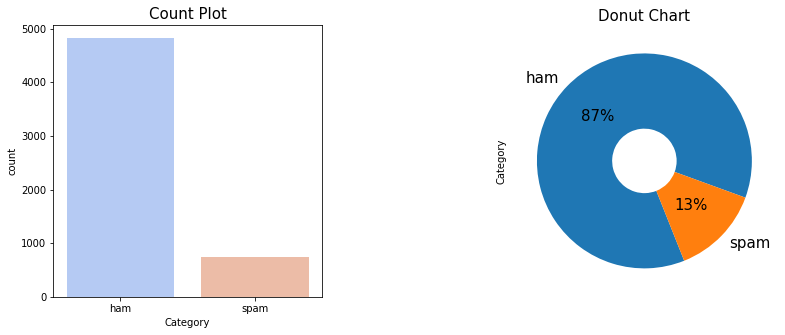

In [11]:
# Plots

plt.figure(figsize = (13,5))
plt.subplots_adjust(hspace=0.4, wspace=0.7)

plt.subplot(1,2,1)
plt.title('Count Plot',fontsize=15)
sns.countplot(data=sms_spam_collection, x = 'Category',palette ='coolwarm')

plt.subplot(1,2,2)
plt.title('Donut Chart', fontsize=15)
sms_spam_collection.Category.value_counts().plot(kind='pie', labels=['ham', 'spam'],
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})

##### Observation :
- Ham messages are more in number in compare to spam message.
- 87% of messages are ham.

### b. Wordcloud

In [12]:
# importing wordcloud

from wordcloud import WordCloud, STOPWORDS

In [13]:
# words using in ham messages

df_ham = sms_spam_collection.loc[sms_spam_collection['Category']=='ham', :]
words_ham = ' '.join(df_ham['Text'])

cleaned_words_ham = " ".join([word for word in words_ham.split() if len(word)>4])   

# words using in spam messages

df_spam = sms_spam_collection.loc[sms_spam_collection['Category']=='spam', :]
words_spam = ' '.join(df_spam['Text'])

cleaned_words_spam = " ".join([word for word in words_spam.split() if len(word)>3])   

In [14]:
# Initializing wordcloud for ham words

wordcloud_ham = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=700,
                      height=400
                     ).generate(cleaned_words_ham)

# Initializing wordcloud for spam words

wordcloud_spam = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=1600,
                      height=800
                     ).generate(cleaned_words_spam)

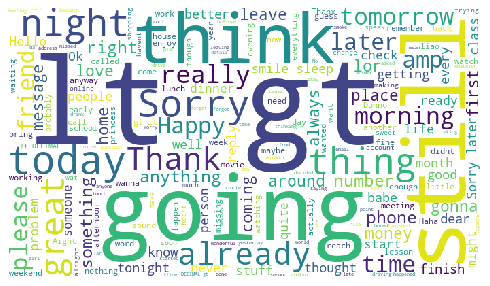

In [15]:
# Showing wordcloud of ham words

plt.figure(figsize=(20,5))
plt.imshow(wordcloud_ham)
plt.axis('off')
plt.show()

##### Observation :
- Through this wordcloud we can observe that only official messages.
- Most common words in ham messages are thank,sorry,today,going,great,etc.
- These words are showing that sender want to convey an information which maybe useful for the reciever.

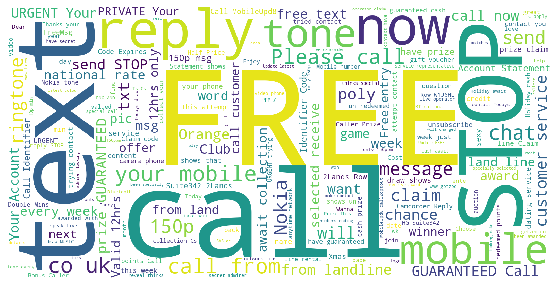

In [16]:
plt.figure(figsize=(20,5))
plt.imshow(wordcloud_spam)
plt.axis('off')
plt.show()

##### Observation :
- The most frequent words in spam messages are urgent,free,call,text,reply,send,etc.
- We can conclude a very intresting observation for spam messages : these messages have high number of spammy words like free,urgent,etc to tempt the reciever.

### c. Frequency Count Plot for spam messages

In [17]:
def count_words(df):
    stopwords=STOPWORDS
    mapping = dict.fromkeys(map(ord,string.punctuation))
    words = {}
    for m in df['Text']:
        try:
            sent = m.split(' ')
        except:
            pass
        for word in sent:
            word = word.strip()
            word = word.lower() # convert into lowercase
            word = word.translate(mapping) # remove all punctuations
            if word in stopwords:  # remove all stopwords
                continue
            if len(word) < 3 or len(word) > 9: # remove unneccessary words
                continue
            if word in words:
                words[word]+=1
            else:
                words[word]=1
    return words

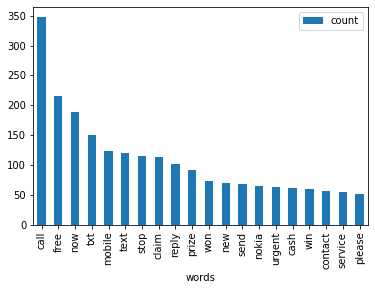

In [18]:
words = count_words(df_spam)
word_df = pd.DataFrame(words.items(),columns=['words','count']) # list to dataframe
word_df.sort_values('count',ascending=False,inplace=True) # sort according to count
word_df[word_df['count']>50].plot(x='words',kind='bar')  # plot bar graph of important words

##### Observation :
- 'call' is most frequent word in spam messages.
- Generally spam messages give temptation to the customers like 'free','prize','won',etc.

## 3. Preprocess the data

#### Our data exploration ends up at here. The next step will be preprocess the data in order to make the learning process more smooth.

##### Preprocessing steps:

- Removing special characters
- Convert sentence into lower case
- Remove Stop Words
- Stemming or Lemmatization

In [19]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pooja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# importing required libraries for data processing
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [21]:
# initializing the lists
clean_text_lst = []
text_len_lst = []

In [22]:
def preprocess(mssg, flag):
    # initialise the inbuilt Stemmer
    stemmer = PorterStemmer()
    # We can also use Lemmatizer instead of Stemmer
    lemmatizer = WordNetLemmatizer()
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",mssg)
    # change sentence to lower case
    letters_only = letters_only.lower()
    # tokenize into words
    words = letters_only.split()
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    #Stemming/Lemmatization
    if(flag == 'stem'):
        words = [stemmer.stem(word) for word in words]
    else:
        words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_text_lst.append(" ".join(words))
    text_len_lst.append(len(words))

In [23]:
# Creating a new column 'label' in which '0' represents 'spam' and '1' represents 'ham'
sms_spam_collection['label']=sms_spam_collection['Category'].apply(lambda x: 0 if x=='spam' else 1)

In [24]:
%%time
# Calling function for Lemmatization
sms_spam_collection['Text'].apply(lambda x: preprocess(x,'lemma'))

# Creating new columns of lemmatized data
sms_spam_collection['clean_text_lemma'] = clean_text_lst # contains lemmatised message

sms_spam_collection['text_len_lemma'] = text_len_lst # contains length of lemmatised message

Wall time: 19.9 s


In [25]:
sms_spam_collection.head()

,Category,Text,label,clean_text_lemma,text_len_lemma
0,ham,"Go until jurong point, crazy.. Available only ...",1,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,1,ok lar joking wif u oni,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,0,free entry wkly comp win fa cup final tkts st ...,21
3,ham,U dun say so early hor... U c already then say...,1,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",1,nah think go usf life around though,7


## 4. Data Preparation

In [26]:
# splitting into test and train

from sklearn.model_selection  import train_test_split

train, test = train_test_split(sms_spam_collection,test_size=0.2, random_state = 20)

In [27]:
# adding clean text to train and test

train_clean_text=[]
for text in train['clean_text_lemma']:
    train_clean_text.append(text)

test_clean_text=[]
for text in test['clean_text_lemma']:
    test_clean_text.append(text)

### Text to numerical vector using Bag of Words

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = "word")

train_features = vectorizer.fit_transform(train_clean_text)

test_features = vectorizer.transform(test_clean_text)

In [29]:
# Cleaned words vocabulary

vectorizer.vocabulary_

{'kent': 2882,
 'vale': 5853,
 'lor': 3133,
 'wait': 5948,
 'ar': 285,
 'laugh': 2983,
 'really': 4383,
 'loud': 3149,
 'talk': 5360,
 'spontaneously': 5103,
 'dont': 1521,
 'care': 828,
 'others': 3832,
 'feel': 1889,
 'probably': 4218,
 'dear': 1316,
 'amp': 192,
 'best': 545,
 'friend': 2077,
 'goodevening': 2239,
 'rat': 4355,
 'hey': 2448,
 'ever': 1758,
 'vote': 5931,
 'next': 3621,
 'theme': 5468,
 'gave': 2150,
 'photo': 4006,
 'registered': 4433,
 'driving': 1560,
 'ah': 114,
 'tmr': 5560,
 'wanna': 5969,
 'meet': 3318,
 'yck': 6254,
 'free': 2058,
 'msg': 3493,
 'single': 4896,
 'find': 1935,
 'partner': 3918,
 'area': 289,
 'real': 4376,
 'people': 3963,
 'waiting': 5951,
 'chat': 910,
 'send': 4742,
 'cncl': 1021,
 'stopcs': 5190,
 'per': 3964,
 'erm': 1723,
 'thought': 5504,
 'contract': 1133,
 'ran': 4347,
 'th': 5453,
 'october': 3737,
 'yetunde': 6271,
 'sorry': 5037,
 'moji': 3440,
 'seem': 4721,
 'busy': 763,
 'able': 13,
 'go': 2219,
 'shopping': 4832,
 'please': 405

In [30]:
print("Total unique words:", len(vectorizer.vocabulary_))

print("Type of train_features:", type(train_features))

print("Shape of input data", train_features.shape)

Total unique words: 6321
Type of train_features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data (4457, 6321)


##### Observation :
- There are 5636 unique words.
- Type of train_feature is 'Sparse Matrix'.
- Shape of input vectorized data has 4457 rows and 5636 columns.

## 5. Data Modelling

In [31]:
# importing libraries required for data modelling

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics 

### 5.1 Train the Model

In [32]:
# Creating a list of all algorithm

Classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    SVC()]

In [33]:
%%time

dense_features = train_features.toarray()

dense_test = test_features.toarray()


Wall time: 47.9 ms


### 5.2 Model Evaluation

In [34]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

  0%|                                                                                            | 0/3 [00:00<?, ?it/s]



****************************************LogisticRegression****************************************


Accuracy of LogisticRegression  : 0.9766816143497757
Precision of LogisticRegression : 0.9947478991596639
Recall of LogisticRegression    : 0.9783057851239669

 Confusion Matrix of LogisticRegression

[[142   5]
 [ 21 947]]

 Heat Map for confusion matrix



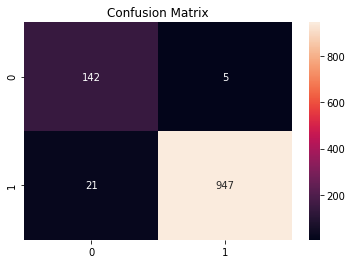

 33%|████████████████████████████                                                        | 1/3 [00:01<00:02,  1.41s/it]


 Classification Report of LogisticRegression

              precision    recall  f1-score   support

           0       0.87      0.97      0.92       147
           1       0.99      0.98      0.99       968

    accuracy                           0.98      1115
   macro avg       0.93      0.97      0.95      1115
weighted avg       0.98      0.98      0.98      1115



****************************************DecisionTreeClassifier****************************************


Accuracy of DecisionTreeClassifier  : 0.9713004484304932
Precision of DecisionTreeClassifier : 0.9873949579831933
Recall of DecisionTreeClassifier    : 0.9791666666666666

 Confusion Matrix of DecisionTreeClassifier

[[143  12]
 [ 20 940]]

 Heat Map for confusion matrix



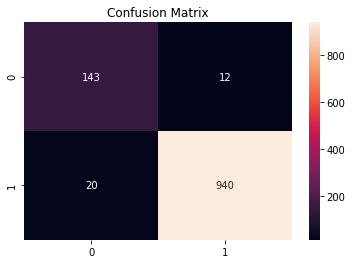

 67%|████████████████████████████████████████████████████████                            | 2/3 [00:15<00:05,  5.36s/it]


 Classification Report of DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.88      0.92      0.90       155
           1       0.99      0.98      0.98       960

    accuracy                           0.97      1115
   macro avg       0.93      0.95      0.94      1115
weighted avg       0.97      0.97      0.97      1115



****************************************SVC****************************************


Accuracy of SVC  : 0.9730941704035875
Precision of SVC : 0.9947478991596639
Recall of SVC    : 0.9742798353909465

 Confusion Matrix of SVC

[[138   5]
 [ 25 947]]

 Heat Map for confusion matrix



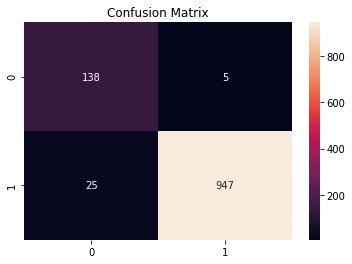

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:16<00:00, 25.47s/it]


 Classification Report of SVC

              precision    recall  f1-score   support

           0       0.85      0.97      0.90       143
           1       0.99      0.97      0.98       972

    accuracy                           0.97      1115
   macro avg       0.92      0.97      0.94      1115
weighted avg       0.98      0.97      0.97      1115



In [35]:
for classifier in tqdm(Classifiers):
    print('\n')
    print(40*'*'+classifier.__class__.__name__+40*'*')
    print('\n')
    
    # Prediction
    fit = classifier.fit(dense_features,train['label'])
    pred = fit.predict(dense_test)
    
    # Accuracy,Precision and Recall
    accuracy = metrics.accuracy_score(pred,test['label'])
    precision = metrics.precision_score(pred,test['label'])
    recall = metrics.recall_score(pred,test['label'])
    print('Accuracy of '+classifier.__class__.__name__+'  : '+str(accuracy))
    print('Precision of '+classifier.__class__.__name__+' : '+str(precision))
    print('Recall of '+classifier.__class__.__name__+'    : '+str(recall))
    
    # Confusion Matrix
    print("\n\b Confusion Matrix of "+classifier.__class__.__name__+'\n')
    con_metric = metrics.confusion_matrix(pred,test['label'])
    print(con_metric)
    
    # Heat Map for confusion matrix
    print("\n\b Heat Map for confusion matrix\n")
    sns.heatmap(con_metric, annot=True, fmt='d')
    plt.title("Confusion Matrix")
    plt.show()
    
    # Classification Report
    print("\n\b Classification Report of "+classifier.__class__.__name__+"\n")
    print(metrics.classification_report(pred,test['label']))


##### Observation :
- In terms of accuracy
 - Accuracy of Logistic Regression   : 0.98
 - Accuracy of Decision Tree         : 0.97
 - Accuracy of SVC                   : 0.97
<br><br>
- In terms of time
 - Time taken by Logistic Regression :  1.41s
 - Time taken by Decision Tree       :  5.36s
 - Time taken by SVC                 : 25.47s 

###### Therefore, we can say that logistic regression is the best predicting model among them.

## 6. Saving the Model and Vectorizer in Pickle

In [36]:
dense_features = train_features.toarray()

model = LogisticRegression()

model.fit(dense_features,train['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
from pickle import dump

dump(vectorizer, open('pickle/countvectorizer.pkl', 'wb'))

dump(model, open('pickle/logit_model.pkl', 'wb'))

## 7. Prediction on Future Data Points

In [38]:
from pickle import load

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [40]:
def preprocess(mssg):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ",mssg)
    
    # change sentence to lower case
    letters_only = letters_only.lower()

    # tokenize into words
    words = letters_only.split()
    
    # remove stop words                
    words = [w for w in words if not w in stopwords.words("english")]
    
    # lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    
    clean_sent = " ".join(words)
    
    return clean_sent

In [41]:
def predict(mssg):
    
    # Loading pretrained CountVectorizer from pickle file
    vectorizer = load(open('pickle/countvectorizer.pkl', 'rb'))
    
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('pickle/logit_model.pkl', 'rb'))
    
    # Preprocessing the tweet
    clean_text = preprocess(mssg)
    
    # Converting text to numerical vector
    clean_text_encoded = vectorizer.transform([clean_text])
    
    # Converting sparse matrix to dense matrix
    text_input = clean_text_encoded.toarray()
    
    # Prediction
    prediction = classifier.predict(text_input)
    
    return prediction

In [42]:
tweet = input("Enter a mssg to check whether it is spam or not: ")

prediction = predict(tweet)

if(prediction == 1):
    print("Spam Message")
else:
    print("Ham Message")

Enter a mssg to check whether it is spam or not: Urgent!! You won a free online course coupon. For registration call us now!!
Spam Message


### Resources :
- ML class notes - By Kanav Bansal refer :- https://github.com/bansalkanav/PYTHON_ML_DS
- Geeks For Geeks refer :- https://www.geeksforgeeks.org/
- Stack Overflow
- Python Documentation

In [43]:
print(45*'*'+"Thank You"+45*'*')

*********************************************Thank You*********************************************
